# import lib

In [123]:
#dataset is  'https://www.kaggle.com/c/house-prices-advanced-regression-techniques'
#refer https://www.kaggle.com/marsggbo/kaggle/comments#%E4%BA%8C%E3%80%81%E8%A7%82%E5%AF%9F%E5%90%84%E9%A1%B9%E4%B8%BB%E8%A6%81%E7%89%B9%E5%BE%81%E4%B8%8E%E6%88%BF%E5%B1%8B%E5%94%AE%E4%BB%B7%E7%9A%84%E5%85%B3%E7%B3%BB

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

# !pip3 install -q tensorflow==2.0.0-beta1
import tensorflow as tf


# import sklearn.preprocessing

In [125]:
print(tf.__version__)

1.13.1


# load data

In [2]:
dataset_train = pd.read_csv("house-prices-advanced-regression-techniques/train.csv")
dataset_test = pd.read_csv("house-prices-advanced-regression-techniques/test.csv")


# dataset_train.describe()


In [3]:
# dataset_train.head()
dataset_train[['Neighborhood', 'CentralAir']].head()

,Neighborhood,CentralAir
0,CollgCr,Y
1,Veenker,Y
2,CollgCr,Y
3,Crawfor,Y
4,NoRidge,Y


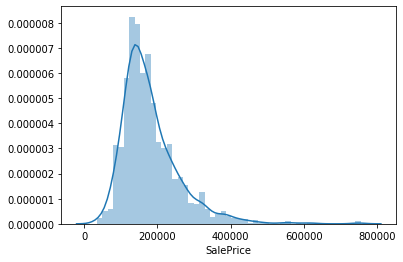

In [4]:
# show distirbution of sale price
sns.distplot(dataset_train['SalePrice'])

In [5]:
#find all category features
columns_numberic = dataset_train.dtypes[dataset_train.dtypes != 'object'].index
# print(columns_numberic)
columns_string = dataset_train.columns.difference(columns_numberic)
dataset_train[columns_string].head(10)
# dataset_train[columns_string].head()

# for column in columns_string:
#     label_encoder = preprocessing.LabelEncoder()
#     dataset_train[column] = label_encoder.fit_transform(dataset_train[column])

# dataset_train.head()

,Alley,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,CentralAir,Condition1,Condition2,...,MiscFeature,Neighborhood,PavedDrive,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,Street,Utilities
0,NaN,1Fam,TA,No,GLQ,Unf,Gd,Y,Norm,Norm,...,NaN,CollgCr,Y,NaN,CompShg,Gable,Normal,WD,Pave,AllPub
1,NaN,1Fam,TA,Gd,ALQ,Unf,Gd,Y,Feedr,Norm,...,NaN,Veenker,Y,NaN,CompShg,Gable,Normal,WD,Pave,AllPub
2,NaN,1Fam,TA,Mn,GLQ,Unf,Gd,Y,Norm,Norm,...,NaN,CollgCr,Y,NaN,CompShg,Gable,Normal,WD,Pave,AllPub
3,NaN,1Fam,Gd,No,ALQ,Unf,TA,Y,Norm,Norm,...,NaN,Crawfor,Y,NaN,CompShg,Gable,Abnorml,WD,Pave,AllPub
4,NaN,1Fam,TA,Av,GLQ,Unf,Gd,Y,Norm,Norm,...,NaN,NoRidge,Y,NaN,CompShg,Gable,Normal,WD,Pave,AllPub
5,NaN,1Fam,TA,No,GLQ,Unf,Gd,Y,Norm,Norm,...,Shed,Mitchel,Y,NaN,CompShg,Gable,Normal,WD,Pave,AllPub
6,NaN,1Fam,TA,Av,GLQ,Unf,Ex,Y,Norm,Norm,...,NaN,Somerst,Y,NaN,CompShg,Gable,Normal,WD,Pave,AllPub
7,NaN,1Fam,TA,Mn,ALQ,BLQ,Gd,Y,PosN,Norm,...,Shed,NWAmes,Y,NaN,CompShg,Gable,Normal,WD,Pave,AllPub
8,NaN,1Fam,TA,No,Unf,Unf,TA,Y,Artery,Norm,...,NaN,OldTown,Y,NaN,CompShg,Gable,Abnorml,WD,Pave,AllPub
9,NaN,2fmCon,TA,No,GLQ,Unf,TA,Y,Artery,Artery,...,NaN,BrkSide,Y,NaN,CompShg,Gable,Normal,WD,Pave,AllPub


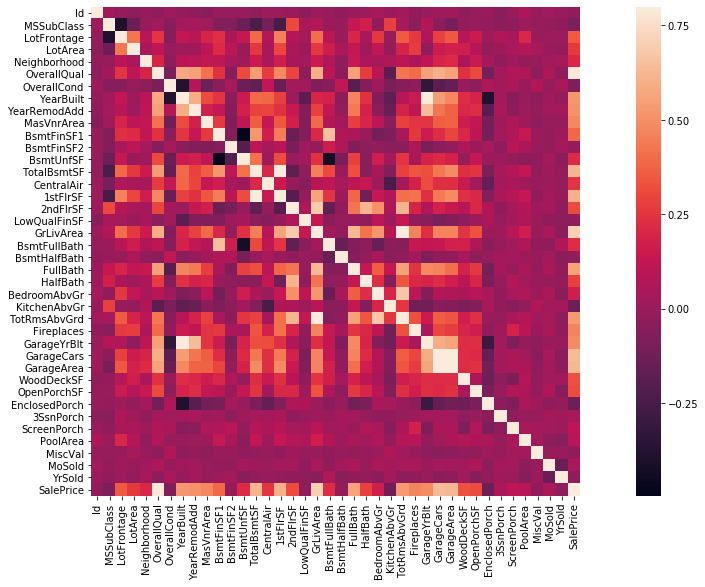

In [6]:
columns_string=['Neighborhood', 'CentralAir']
for column in columns_string:
    label_encoder = preprocessing.LabelEncoder()
    dataset_train[column] = label_encoder.fit_transform(dataset_train[column])
    
corrmat = dataset_train.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=0.8, square=True)

In [7]:
dataset_train[columns_string].head()

,Neighborhood,CentralAir
0,5,1
1,24,1
2,5,1
3,6,1
4,15,1


# preprocess data

In [8]:
#concat train and test after filter column 'saleprice' in train , and remove column 'id'
dataset_all = pd.concat([dataset_train.iloc[:,1:-1], dataset_test.iloc[:,1:]], axis=0, ignore_index=True)

#normalize numberic variable
features_numberic = dataset_all.dtypes[dataset_all.dtypes != 'object'].index
dataset_all[features_numberic] = dataset_all[features_numberic].apply(lambda x : ((x - x.mean()) / x.std()))
dataset_all[features_numberic] = dataset_all[features_numberic].fillna(0)

#hot-encode discreted varaibale
dataset_all = pd.get_dummies(dataset_all, dummy_na=True)

In [9]:
#split train and label dataset
train_labels_origin = dataset_train['SalePrice']

train_labels_mean = train_labels_origin.mean()
train_labels_std = train_labels_origin.std()

#normalize train label
train_labels = (train_labels_origin - train_labels_mean ) / train_labels_std

n_train = train_labels.shape[0]
print("train_labels.shape=", n_train)
train_X = dataset_all.iloc[0:n_train, :]
print("train_X.shape=", train_X.shape)

test_X = dataset_all.iloc[n_train: , :]
print("test_X.shape=", test_X.shape)

train_labels.shape= 1460
train_X.shape= (1460, 358)
test_X.shape= (1459, 358)


In [82]:
# num_features = train_X.shape[1]
# train_X.head()
# print(num_features)

331


# define model

In [20]:

# print('{} num_features'.format(num_features))
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(64, input_shape=(train_X.shape[1], ), activation="relu"))
model.add(tf.keras.layers.Dropout(0.7))
model.add(tf.keras.layers.Dense(1))

optimizer = tf.keras.optimizers.Adam()
model.compile(optimizer, loss="mse") #平均均方对数误差
# model.compile(optimizer, loss=tf.keras.losses.MeanSquaredLogarithmicError()) #rmsle
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 64)                22976     
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 65        
Total params: 23,041
Trainable params: 23,041
Non-trainable params: 0
_________________________________________________________________


# train model

In [21]:
history = model.fit(train_X, train_labels, batch_size=128, epochs=100, validation_split=0.4)

Train on 876 samples, validate on 584 samples
Epoch 1/100
876/876 [==============================] - 0s 442us/sample - loss: 1.7533 - val_loss: 0.5589
Epoch 2/100
876/876 [==============================] - 0s 34us/sample - loss: 0.9976 - val_loss: 0.3332
Epoch 3/100
876/876 [==============================] - 0s 36us/sample - loss: 0.6953 - val_loss: 0.2880
Epoch 4/100
876/876 [==============================] - 0s 33us/sample - loss: 0.4597 - val_loss: 0.2758
Epoch 5/100
876/876 [==============================] - 0s 27us/sample - loss: 0.5205 - val_loss: 0.2725
Epoch 6/100
876/876 [==============================] - 0s 34us/sample - loss: 0.4265 - val_loss: 0.2682
Epoch 7/100
876/876 [==============================] - 0s 39us/sample - loss: 0.4272 - val_loss: 0.2585
Epoch 8/100
876/876 [==============================] - 0s 48us/sample - loss: 0.3320 - val_loss: 0.2474
Epoch 9/100
876/876 [==============================] - 0s 39us/sample - loss: 0.3473 - val_loss: 0.2438
Epoch 10/100
876/

876/876 [==============================] - 0s 37us/sample - loss: 0.1631 - val_loss: 0.1778
Epoch 79/100
876/876 [==============================] - 0s 32us/sample - loss: 0.1529 - val_loss: 0.1742
Epoch 80/100
876/876 [==============================] - 0s 30us/sample - loss: 0.1581 - val_loss: 0.1730
Epoch 81/100
876/876 [==============================] - 0s 32us/sample - loss: 0.1726 - val_loss: 0.1768
Epoch 82/100
876/876 [==============================] - 0s 31us/sample - loss: 0.1498 - val_loss: 0.1769
Epoch 83/100
876/876 [==============================] - 0s 28us/sample - loss: 0.1654 - val_loss: 0.1709
Epoch 84/100
876/876 [==============================] - 0s 30us/sample - loss: 0.1504 - val_loss: 0.1708
Epoch 85/100
876/876 [==============================] - 0s 31us/sample - loss: 0.1405 - val_loss: 0.1743
Epoch 86/100
876/876 [==============================] - 0s 28us/sample - loss: 0.1517 - val_loss: 0.1754
Epoch 87/100
876/876 [==============================] - 0s 29us/samp

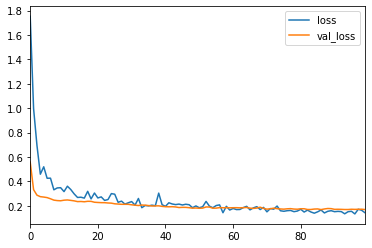

In [22]:
df_his = pd.DataFrame(history.history)
df_his.plot()
plt.show()

In [306]:
train_label_predicted = model.predict(train_X) 
train_label_predicted = train_label_predicted * train_labels_std + train_labels_mean



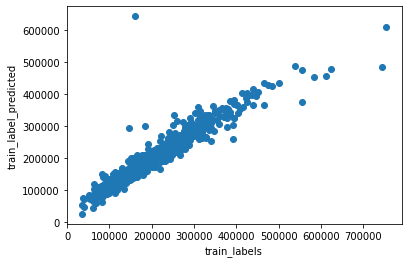

In [307]:
plt.figure()
plt.scatter(train_labels_origin, train_label_predicted)
plt.xlabel("train_labels")
plt.ylabel("train_label_predicted")
plt.plot()
plt.show()

# predict 

In [308]:
results = model.predict(test_X) 
results  = results * train_labels_std + train_labels_mean 

In [309]:
results = results.reshape(1,-1)[0]
print('test_x.shape={},  result.shape={}'.format(test_X.shape[0], len(results)))
dataset_test["SalePrice"] = pd.Series(results)

test_x.shape=1459,  result.shape=1459


In [311]:
submission = pd.concat([dataset_test['Id'], dataset_test['SalePrice']], axis = 1)
submission.to_csv("submission.csv", index = False, mode="w")
submission.head()

,Id,SalePrice
0,1461,131284.656250
1,1462,173873.750000
2,1463,178591.421875
3,1464,184028.656250
4,1465,174770.406250
